<a href="https://colab.research.google.com/github/PhucTran112233/ProjectAI/blob/main/Project_AI_Celeb_vn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflowjs

In [1]:
# liên kết Google drive với colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Tải thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import load_model
from keras.models import  Sequential
from keras import regularizers
from keras import layers
import tensorflowjs as tfjs
from keras.layers import BatchNormalization

In [26]:
train_data = '/content/drive/MyDrive/AI_4/Train'
val_data =  '/content/drive/MyDrive/AI_4/Validation'

In [27]:
#preprocessing
train_scale = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,   
                                   height_shift_range=0.2,
                                   horizontal_flip=True, 
                                   vertical_flip=True,
                                   validation_split=0.2)

train_input = train_scale.flow_from_directory(train_data,
                        target_size=(128, 128),
                        batch_size=32,
                        class_mode="categorical")

val_scale = ImageDataGenerator(rescale=1./255)

val_input = val_scale.flow_from_directory(val_data,
                        target_size=(128,128),
                        batch_size=32,
                        class_mode="categorical")

Found 957 images belonging to 20 classes.
Found 95 images belonging to 20 classes.


In [28]:
#MODEL CNN
model=Sequential()

#LAYER 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))


#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())

#Dense(512) is a fully-connected layer with 128 hidden units
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(20,activation='softmax'))  #20 class_name
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_12 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 64, 64, 64)      

In [29]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.005)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
face_train = model.fit(train_input,batch_size=32,epochs=150,verbose=1,validation_data=val_input)

Epoch 1/150
30/30 [==============================] - 6s 206ms/step - loss: 2.4913 - accuracy: 0.2623 - val_loss: 2.4706 - val_accuracy: 0.2316
Epoch 2/150
30/30 [==============================] - 6s 202ms/step - loss: 2.5111 - accuracy: 0.2330 - val_loss: 2.9034 - val_accuracy: 0.0737
Epoch 3/150
30/30 [==============================] - 6s 202ms/step - loss: 2.4802 - accuracy: 0.2529 - val_loss: 2.7147 - val_accuracy: 0.1895
Epoch 4/150
30/30 [==============================] - 6s 201ms/step - loss: 2.4776 - accuracy: 0.2602 - val_loss: 2.3648 - val_accuracy: 0.2632
Epoch 5/150
30/30 [==============================] - 6s 201ms/step - loss: 2.5125 - accuracy: 0.2299 - val_loss: 2.8667 - val_accuracy: 0.1789
Epoch 6/150
30/30 [==============================] - 6s 199ms/step - loss: 2.5169 - accuracy: 0.2456 - val_loss: 2.7738 - val_accuracy: 0.1789
Epoch 7/150
30/30 [==============================] - 6s 204ms/step - loss: 2.4647 - accuracy: 0.2508 - val_loss: 2.4133 - val_accuracy: 0.2000

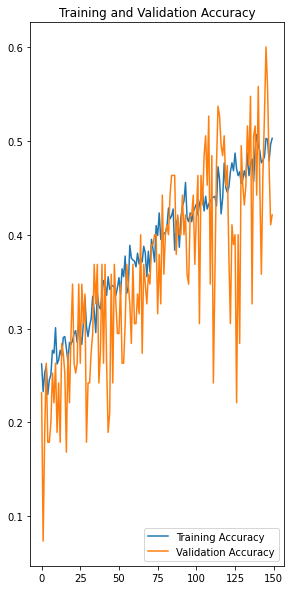

In [33]:
acc = face_train.history['accuracy']
val_acc = face_train.history['val_accuracy']

loss = face_train.history['loss']
val_loss = face_train.history['val_loss']
epochs_range=range(150)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [34]:
tfjs.converters.save_keras_model(model,'models')